<a href="https://colab.research.google.com/github/takashinnosuke/study_Keras/blob/main/MovieReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDbデータセットの読み込み

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = \
  imdb.load_data(num_words=10000)

※一つのレビューを英語の単語にデコードしてみる

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

整数のシーケンスを二値行列に変換

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

  #形状が(len(sequences), dimension)の行列を作成し，0で埋める
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. #result[i]のインデックスを1に設定
  return results

#訓練データのベクトル化
x_train = vectorize_sequences(train_data)
#テストデータのベクトル化
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

モデルの定義

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

モデルのコンパイル

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

訓練データセットの設定

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

モデルの訓練

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 43ms/step - loss: 0.4969 - acc: 0.7887 - val_loss: 0.3729 - val_acc: 0.8625
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2928 - acc: 0.9019 - val_loss: 0.3078 - val_acc: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2102 - acc: 0.9309 - val_loss: 0.2755 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1676 - acc: 0.9440 - val_loss: 0.2790 - val_acc: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1355 - acc: 0.9561 - val_loss: 0.3431 - val_acc: 0.8684
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1148 - acc: 0.9639 - val_loss: 0.3115 - val_acc: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0929 - acc: 0.9733 - val_loss: 0.3166 - val_acc: 0.8834
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0797 - a

訓練データと検証データでの損失値をプロット

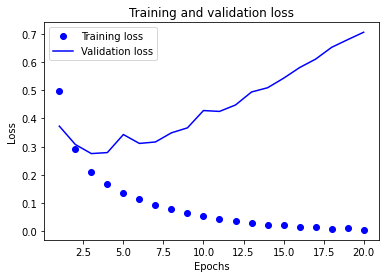

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

訓練データと検証データでの正解率をプロット

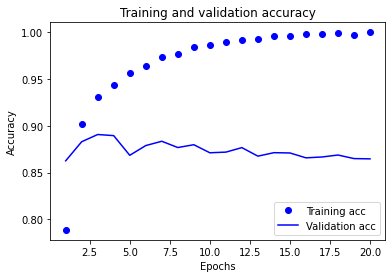

In [ ]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

モデルの訓練をやり直す

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.4611 - accuracy: 0.8200
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2702 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2039 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2930 - accuracy: 0.8836


In [ ]:
results

[0.2929692566394806, 0.8835999965667725]